### Raport - dochody z podatku PIT w latach 2019-2020
Plikami zawierającymi wszystkie obliczane statystyki są *'gminy_all.xlsx'*, *'powiaty_all.xlsx'* oraz *'wojewodztwa_all.xlsx'*, można znaleźć w nich więcej szczegółów. Obliczone i zaprezentowane zostały: różnica dochodów z podatku PIT w jednostkach samorządu terytorialnego (JST), średni dochód opodatkowany w każdj JST, wariancja dochodów opodatkowanych w powiatach (na podstawie gmin) oraz w województwach (na podstawie powiatów), ważona średnia dochodów w jednostkach podległych dla powiatów oraz dla województw.

In [1]:
# Auto-odświeżanie zmian w paczce.
%load_ext autoreload
%autoreload 2

In [2]:
# Importowanie paczek
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Lokalna paczka
import pit_package.pit_poland as pit_poland

In [3]:
# Ustalenie ścieżek, do plików z danymi.
# Katalog główny (używany również do eksportu)
katalog = "Z:/Kuba/Studia/uw/III rok/nypd"

# Dane PIT za 2020
gminy_pit_path20 = katalog + "/pit_2020/20210215_Gminy_2_za_2020.xlsx"
powiaty_NPP_pit_path20 = katalog + "/pit_2020/20210215_Miasta_NPP_2_za_2020.xlsx"
powiaty_pit_path20 = katalog + "/pit_2020/20210211_Powiaty_za_2020.xlsx"
wojewodztwa_pit_path20 = katalog + "/pit_2020/20210211_Województwa_za_2020.xlsx"


# Dane PIT za 2019
gminy_pit_path19 = katalog + "/pit_2019/20200214_Gminy_za_2019.xlsx"
powiaty_NPP_pit_path19 = katalog + "/pit_2019/20200214_Miasta_NPP_za_2019.xlsx"
powiaty_pit_path19 = katalog + "/pit_2019/20200214_Powiaty_za_2019.xlsx"
wojewodztwa_pit_path19 = katalog + "/pit_2019/20200214_Wojewodztwa_za_2019.xlsx"

# Dane o ludności
gminy_ppl_path20 = katalog + "/ludnosc/Tabela_IV.xls"
powiaty_ppl_path20 = katalog + "/ludnosc/Tabela_III.xls"
wojewodztwa_ppl_path20 = katalog + "/ludnosc/Tabela_II.xls"

In [4]:
# Wczytanie danych
# PIT 2020
data_gminy_pit_20 = pit_poland.data_import.gminy_import_pit(gminy_pit_path20)
data_powiaty_pit_20 = pit_poland.data_import.powiaty_import_pit(powiaty_pit_path20, powiaty_NPP_pit_path20)
data_wojewodztwa_pit_20 = pit_poland.data_import.wojewodztwa_import_pit(wojewodztwa_pit_path20)
# PIT 2019
data_gminy_pit_19 = pit_poland.data_import.gminy_import_pit(gminy_pit_path19)
data_powiaty_pit_19 = pit_poland.data_import.powiaty_import_pit(powiaty_pit_path19, powiaty_NPP_pit_path19)
data_wojewodztwa_pit_19 = pit_poland.data_import.wojewodztwa_import_pit(wojewodztwa_pit_path19)
# Ludność 2020
data_gminy_ppl_20 = pit_poland.data_import.gminy_import_ppl(gminy_ppl_path20)
data_powiaty_ppl_20 = pit_poland.data_import.powiaty_import_ppl(powiaty_ppl_path20)
data_wojewodztwa_ppl_20 = pit_poland.data_import.wojewodztwa_import_ppl(wojewodztwa_ppl_path20)

In [5]:
# Obliczenie różnic w dochodach z podatku PIT (2019 vs 2020).
diff_gminy = pit_poland.analysis.difference_pit(data_gminy_pit_19, data_gminy_pit_20)
diff_powiaty = pit_poland.analysis.difference_pit(data_powiaty_pit_19, data_powiaty_pit_20)
diff_wojewodztwa = pit_poland.analysis.difference_pit(data_wojewodztwa_pit_19, data_wojewodztwa_pit_20)
# Eksport do plików excelowych.
pit_poland.data_export.save_to_excel(diff_gminy, katalog, "diff_gminy")
pit_poland.data_export.save_to_excel(diff_powiaty, katalog, "diff_powiaty")
pit_poland.data_export.save_to_excel(diff_wojewodztwa, katalog, "diff_wojewodztwa")


0

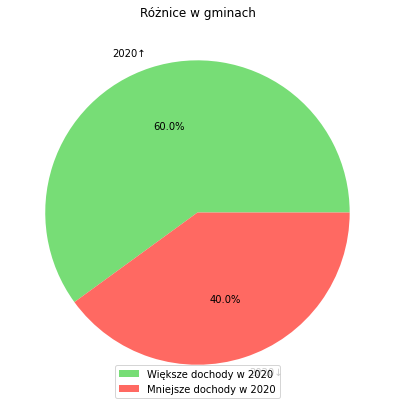

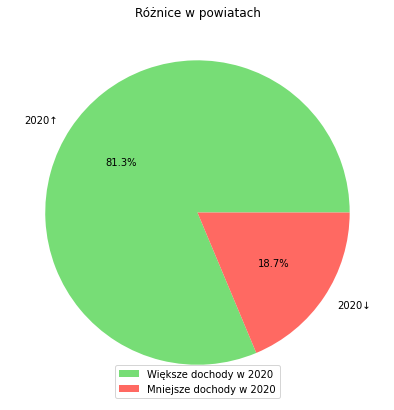

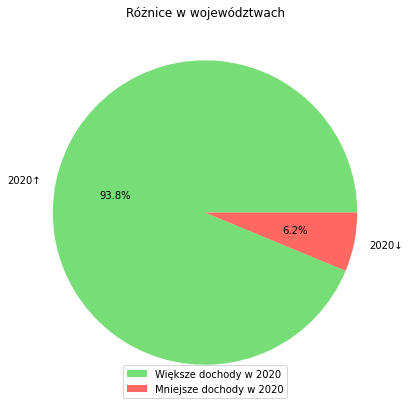

In [6]:
#Wykresy przedstawiające stosunek JST, w kótrych dochody z PIT wzrosły do JST, w których dochody z PIT zmalały (2019 vs 2020).
pit_poland.analysis.charts.diff_pie(diff_gminy, "Różnice w gminach")
pit_poland.analysis.charts.diff_pie(diff_powiaty, "Różnice w powiatach")
pit_poland.analysis.charts.diff_pie(diff_wojewodztwa, "Różnice w województwach")

In [7]:
# Obliczenie średnich dochodów opodatkowanych w JST. 
# Przyjęto, że pracuje 57% populacji oraz wszyscy płacą podatek równy 17% dochodu opodatkowanego. (dodać opcję zmiany założeń)
avg_gminy = pit_poland.analysis.average_income(data_gminy_pit_20, data_gminy_ppl_20)
avg_powiaty = pit_poland.analysis.average_income(data_powiaty_pit_20, data_powiaty_ppl_20)
avg_wojewodztwa = pit_poland.analysis.average_income(data_wojewodztwa_pit_20, data_wojewodztwa_ppl_20)
# Eksport do plików excelowych.
pit_poland.data_export.save_to_excel(avg_gminy, katalog, "avg_gminy")
pit_poland.data_export.save_to_excel(avg_powiaty, katalog, "avg_powiaty")
pit_poland.data_export.save_to_excel(avg_wojewodztwa, katalog, "avg_wojewodztwa")

0

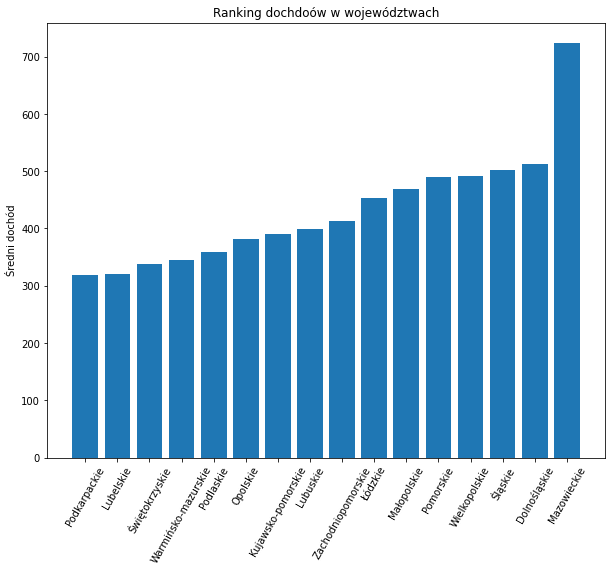

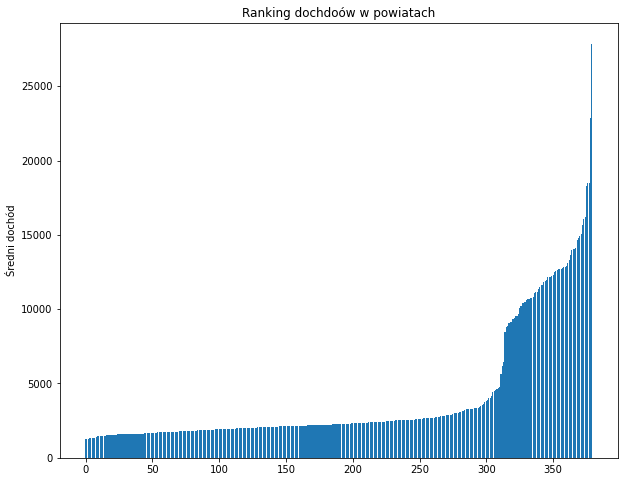

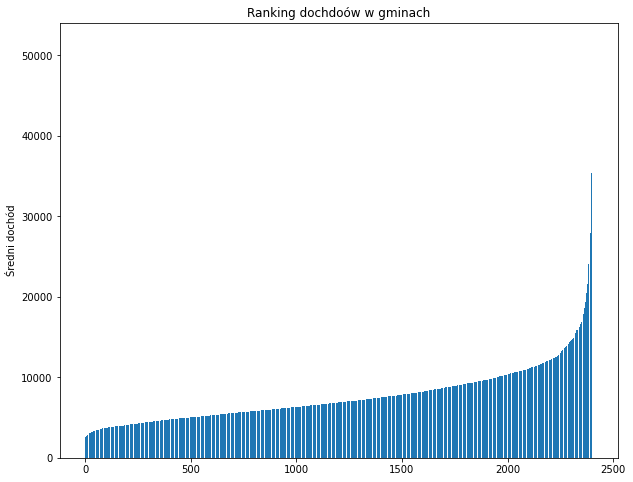

In [8]:
# Wykresy przedstawiające średni dochód posortowany rosnąco.
pit_poland.analysis.charts.avg_bar(avg_wojewodztwa, "Ranking dochdoów w województwach")
pit_poland.analysis.charts.avg_bar(avg_powiaty, "Ranking dochdoów w powiatach")
pit_poland.analysis.charts.avg_bar(avg_gminy, "Ranking dochdoów w gminach")

In [9]:
# Obliczenie średniej ważonej ludnością w gminach dla powiatów oraz ważonej ludnością w powiatach dla województw.
weigh_avg_powiaty = pit_poland.analysis.weighted_average(avg_gminy, avg_powiaty)
weigh_avg_wojewodztwa = pit_poland.analysis.weighted_average(avg_powiaty, avg_wojewodztwa)
# Eksport do plików excelowych.
pit_poland.data_export.save_to_excel(weigh_avg_powiaty, katalog, "weigh_avg_powiaty")
pit_poland.data_export.save_to_excel(weigh_avg_wojewodztwa, katalog, "weigh_avg_wojewodztwa")

0

In [10]:
# Obliczenie wariancji dochodu w gminach dla powiatów oraz w powiatach dla województw.
var_powiaty = pit_poland.analysis.variance_income(avg_gminy, avg_powiaty)
var_wojewodztwa = pit_poland.analysis.variance_income(avg_powiaty, avg_wojewodztwa)
# Eksport do plików excelowych.
pit_poland.data_export.save_to_excel(var_powiaty, katalog, "var_powiaty")
pit_poland.data_export.save_to_excel(var_wojewodztwa, katalog, "var_wojewodztwa")

0

In [11]:
# Stworzenie plików excelowych ze wszsytkimi statystykami policzonymi dla danych jst.
gminy_all = avg_gminy.join(diff_gminy['Difference'])
powiaty_all0 = weigh_avg_powiaty.join(var_powiaty['variance_income'])
powiaty_all = powiaty_all0.join(diff_powiaty['Difference'])
wojewodztwa_all0 = weigh_avg_wojewodztwa.join(var_wojewodztwa['variance_income'])
wojewodztwa_all = wojewodztwa_all0.join(diff_wojewodztwa['Difference'])
# Eksport do plików excelowych.
pit_poland.data_export.save_to_excel(gminy_all, katalog, "gminy_all")
pit_poland.data_export.save_to_excel(powiaty_all, katalog, "powiaty_all")
pit_poland.data_export.save_to_excel(wojewodztwa_all, katalog, "wojewodztwa_all")

0